# Data Mining Project - Phase 2

_Authors: Tooraj Taraz - Afarin Zamanian_

## Setup

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import pickle
from transformers import BertTokenizer, BertModel, BertForTokenClassification
from sentence_transformers import SentenceTransformer

In [ ]:
import logging
logging.basicConfig(level=logging.INFO)

In [4]:
embedder_model = SentenceTransformer('all-MiniLM-L6-v2')

In [5]:
#Loading the data including merged and cleaned data
uva_raw = pd.read_csv("data/uva_keywords_2022-06-04-16-57-48_266864.csv")
uva_raw.head()

,University,Abbreviation,Department,Course title,Unit,Professor,Objective,Prerequisite,Required Skills,Outcome,...,merged_clean,keywords_1_1,keywords_1_2,keywords_1_3,keywords_2_1,keywords_2_2,keywords_2_3,keywords_3_1,keywords_3_2,keywords_3_3
0,Universiteit van Amsterdam,UvA,AUC,A Golden Age? History and Heritage of the Dutc...,6 EC,NaN,The students will learn about historical devel...,NaN,NaN,NaN,...,called golden age corresponds roughly 17th cen...,"[('colonialism', 0.3153), ('literature', 0.304...","[('dutch history', 0.4774), ('17th century', 0...","[('17th century important', 0.537), ('netherla...",[],"[('dutch history', 0.4774), ('17th century', 0...","[('17th century important', 0.537), ('netherla...",[],[],"[('17th century important', 0.537), ('netherla..."
1,Universiteit van Amsterdam,UvA,AUC,Academic Writing Skills,6 EC,NaN,Students will:\r\n\r\n• demonstrate digital li...,NaN,NaN,NaN,...,academic writing skill introduction academic s...,"[('literacy', 0.4732), ('academic', 0.4421), (...","[('literacy academic', 0.5888), ('skill academ...","[('skill academic reading', 0.6083), ('literac...",[],"[('literacy academic', 0.5888), ('skill academ...","[('skill academic reading', 0.6083), ('literac...",[],[],"[('skill academic reading', 0.6083), ('academi..."
2,Universiteit van Amsterdam,UvA,AUC,Adaptation Studies,6 EC,NaN,Students will be able to understand and analyz...,All of the following:\r\n60 EC\r\nIntroduction...,NaN,NaN,...,although originality work literature art often...,"[('literature', 0.3591), ('cultural', 0.3162),...","[('study adaptation', 0.5093), ('adaptation st...","[('consider adaptation cultural', 0.5469), ('s...",[],"[('study adaptation', 0.5093), ('adaptation st...","[('consider adaptation cultural', 0.5469), ('s...",[],[],"[('consider adaptation cultural', 0.5469), ('s..."
3,Universiteit van Amsterdam,UvA,AUC,Addiction,6 EC,NaN,• The student understands basic pharmacologica...,One of the following:\r\nBrain and Cognition\r...,NaN,NaN,...,goal course gain insight etiology neurobiology...,"[('addiction', 0.4446), ('addict', 0.4035), ('...","[('addiction student', 0.5854), ('drug addicti...","[('study drug addiction', 0.6908), ('addiction...",[],"[('addiction student', 0.5854), ('drug addicti...","[('study drug addiction', 0.6908), ('addiction...",[],[],"[('study drug addiction', 0.6908), ('addiction..."
4,Universiteit van Amsterdam,UvA,AUC,Advanced Creative Writing,6 EC,NaN,1) The student builds off her/his prior knowle...,Creative Writing\r\nRegistration\r\nThis cours...,NaN,NaN,...,course continues diverse exploration creative ...,"[('writing', 0.4873), ('write', 0.4306), ('stu...","[('writing student', 0.6252), ('practice writi...","[('creative writing student', 0.7125), ('writi...",[],"[('writing student', 0.6252), ('practice writi...","[('creative writing student', 0.7125), ('writi...",[],[],"[('creative writing student', 0.7125), ('writi..."


In [6]:
#Discarding unnecessary columns
#necessary columns are:
# University, Abbreviation, Department, Course title, Unit, merged_clean
uva = uva_raw[['University', 'Abbreviation', 'Department', 'Course title', 'Unit', 'merged_desc', 'merged_clean']]
uva.head()

,University,Abbreviation,Department,Course title,Unit,merged_desc,merged_clean
0,Universiteit van Amsterdam,UvA,AUC,A Golden Age? History and Heritage of the Dutc...,6 EC,"The so called Golden Age, which corresponds ro...",called golden age corresponds roughly 17th cen...
1,Universiteit van Amsterdam,UvA,AUC,Academic Writing Skills,6 EC,Academic Writing Skills is an introduction to ...,academic writing skill introduction academic s...
2,Universiteit van Amsterdam,UvA,AUC,Adaptation Studies,6 EC,Although the originality of a work of literatu...,although originality work literature art often...
3,Universiteit van Amsterdam,UvA,AUC,Addiction,6 EC,The goal of this course is to gain insight int...,goal course gain insight etiology neurobiology...
4,Universiteit van Amsterdam,UvA,AUC,Advanced Creative Writing,6 EC,This course continues the diverse exploration ...,course continues diverse exploration creative ...


## Sentence Transformer

In [ ]:
sentences = uva['merged_clean'].tolist()
# trim sentences to 200 words and
# filter out entries of type float and replace them with blank strings
sentences = [s[:200] if type(s) is str else '' for s in sentences]
embeddings = embedder_model.encode(sentences)
pickle.dump(embeddings, open('data/embeddings.pkl', 'wb'))

In [9]:
# import the embeddings from the pickle file
embeddings = pickle.load(open('data/embeddings.pkl', 'rb'))
uva_embed = pd.DataFrame(columns=['title', 'text', 'label', 'embedding'])
# create a dataframe with the embeddings and the labels
uva_embed = uva_embed.assign(title=uva['Course title'], text=uva['merged_clean'], embedding=[*embeddings], label=uva['Department'])
uva_embed.head()

,title,text,label,embedding
0,A Golden Age? History and Heritage of the Dutc...,called golden age corresponds roughly 17th cen...,AUC,"[0.031198146, 0.022131287, 0.017293794, 0.0027..."
1,Academic Writing Skills,academic writing skill introduction academic s...,AUC,"[0.013186505, -0.045883313, 0.05704911, 0.0264..."
2,Adaptation Studies,although originality work literature art often...,AUC,"[-0.0006187968, -0.043472435, -0.013636122, -0..."
3,Addiction,goal course gain insight etiology neurobiology...,AUC,"[0.006840667, -0.05330495, -0.039414488, 0.019..."
4,Advanced Creative Writing,course continues diverse exploration creative ...,AUC,"[0.026689457, -0.07020469, 0.012637494, 0.0472..."


## Clustering

### K-Means Clustering

In [8]:
from sklearn.cluster import MiniBatchKMeans

def cluster_kmeans(embeddings, n_clusters):
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=0, init='k-means++', n_init=5).fit(embeddings)
    return kmeans.labels_

The metrics used to evaluate the quality of the clustering are:
* **Homogeneity**: A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
  
* **Completeness**: A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.

* **Rand Index**: The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings. **Adjusted Rand Score** is the Rand Index adjusted for chance. The adjusted Rand index is guaranteed to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).

$$ RI=\frac{TP+TN}{TP+FP+TN+FN} $$

$$ ARI =\frac{RI - Expected_{RI}}{max(RI) - Expected_{RI}} $$



In [49]:
from sklearn.metrics import homogeneity_score, completeness_score, adjusted_rand_score

def get_metrics(labels_true, labels_pred, verbose=True):
    homogeneity = homogeneity_score(labels_true, labels_pred)
    completeness = completeness_score(labels_true, labels_pred)
    rand_score = adjusted_rand_score(labels_true, labels_pred)
    if verbose:
        print('Homogeneity: %0.3f' % homogeneity)
        print('Completeness: %0.3f' % completeness)
        print('Adjusted Rand Index: %0.3f' % rand_score)
    return homogeneity, completeness, rand_score

In [10]:
# dataframe to compare results
cluster_results = pd.DataFrame(columns=['Method', 'Homogeneity', 'Completeness', 'Rand_score', 'Comment'])

In [11]:
km_labels = cluster_kmeans(embeddings, 25)
km_homogenity, km_completeness, km_rand_score = get_metrics(uva_embed['label'], km_labels)
cluster_results = cluster_results.append({'Method': 'K-Means', 'Homogeneity': km_homogenity, 
    'Completeness': km_completeness, 'Rand_score': km_rand_score, 
    'Comment': 'k = 25'}, ignore_index=True)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1044: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "


Homogeneity: 0.303
Completeness: 0.277
Adjusted Rand Index: 0.088


To be able to plot the results, we can re-do the clustering using PCA-reduced data. There is of course a difference (somewhat tangible one) between the original clustering and the PCA-reduced one.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1044: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "


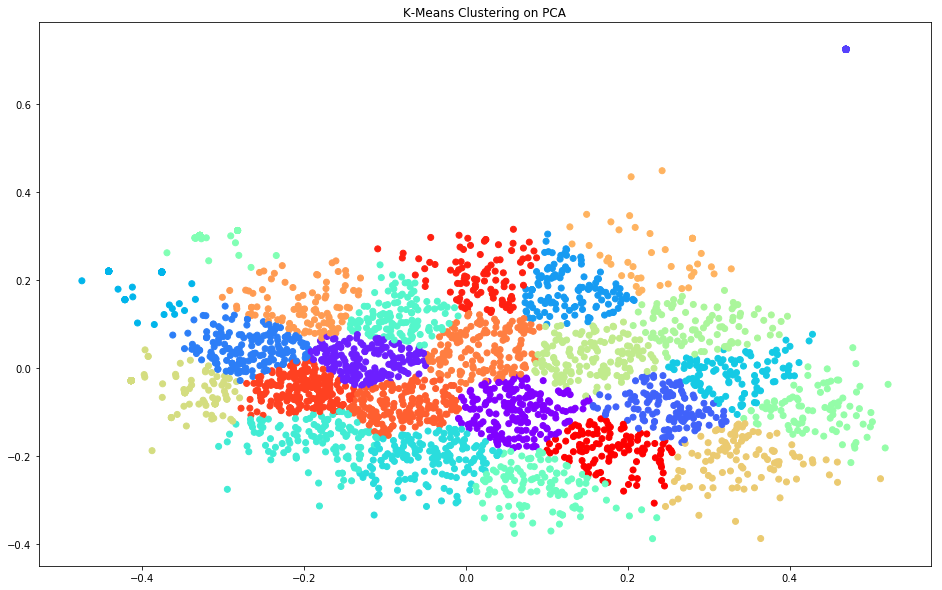

In [29]:
# reduce data with pca and cluster again
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(embeddings)
pca_labels = cluster_kmeans(pca, 25)
plt.figure(figsize=(16, 10))
plt.scatter(pca[:, 0], pca[:, 1], c=pca_labels, cmap='rainbow')
plt.title('K-Means Clustering on PCA')
plt.show()

In [30]:
km_pca_homogenity, km_pca_completeness, km_pca_rand_score = get_metrics(uva_embed['label'], pca_labels)

Homogeneity: 0.144
Completeness: 0.131
Adjusted Rand Index: 0.027


We could also increase the number of clusters to be more than the number of classes in the dataset. This might lead to more homogeinity but decreased completeness. We try this for 30, 35, and 40 clusters.

In [14]:
km_labels = cluster_kmeans(embeddings, 30)
km_homogenity, km_completeness, km_rand_score = get_metrics(uva_embed['label'], km_labels)
cluster_results = cluster_results.append({'Method': 'K-Means', 'Homogeneity': km_homogenity, 
    'Completeness': km_completeness, 'Rand_score': km_rand_score, 
    'Comment': 'k = 30'}, ignore_index=True)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1044: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "


Homogeneity: 0.320
Completeness: 0.278
Adjusted Rand Index: 0.087


In [56]:
km_labels = cluster_kmeans(embeddings, 35)
km_homogenity, km_completeness, km_rand_score = get_metrics(uva_embed['label'], km_labels)
cluster_results = cluster_results.append({'Method': 'K-Means', 'Homogeneity': km_homogenity, 
    'Completeness': km_completeness, 'Rand_score': km_rand_score, 
    'Comment': 'k = 35'}, ignore_index=True)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1044: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "


Homogeneity: 0.339
Completeness: 0.283
Adjusted Rand Index: 0.092


In [16]:
km_labels = cluster_kmeans(embeddings, 40)
km_homogenity, km_completeness, km_rand_score = get_metrics(uva_embed['label'], km_labels)
cluster_results = cluster_results.append({'Method': 'K-Means', 'Homogeneity': km_homogenity, 
    'Completeness': km_completeness, 'Rand_score': km_rand_score, 
    'Comment': 'k = 40'}, ignore_index=True)
cluster_results.tail()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1044: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "


Homogeneity: 0.342
Completeness: 0.275
Adjusted Rand Index: 0.087


,Method,Homogeneity,Completeness,Rand_score,Comment
0,K-Means,0.303484,0.277030,0.087979,k = 25
1,K-Means,0.319773,0.277523,0.087294,k = 30
2,K-Means,0.339446,0.283130,0.092427,k = 35
3,K-Means,0.342225,0.275487,0.086915,k = 40


Overall, the best number of clusters is 35. Let's visualise that one:

In [55]:
def print_samples(pred_labels, courses):
    clustered_courses = {}
    for course_id, cluster_id in enumerate(pred_labels):
        if cluster_id not in clustered_courses:
            clustered_courses[cluster_id] = []
        clustered_courses[cluster_id].append(courses['title'][course_id])

    for i, cluster in clustered_courses.items():
        print("Cluster ", i+1, " - ", len(cluster), " courses:")
        print(cluster[:15])
        print("")

In [57]:
print_samples(km_labels, uva_embed)

Cluster  25  -  55  courses:
['A Golden Age? History and Heritage of the Dutch Republic', 'Advanced Macro-Economics', 'Economic Thought in a Historical Perspective', 'Environmental Economics', 'Fundamentals of Macro-Economics', 'Sustainable City', 'Theme Social Systems: Globalisation - Global Economics', 'Insolvency Law and Corporate Finance', 'International Trade Law and Domestic Regulation(Open UvA course)', 'Community Service Learning Project: Curaçao', 'Development Economics', 'History of Economic Thought', 'International Business', 'Introduction Econometrics and Actuarial Science', 'Macroeconomics 2']

Cluster  7  -  167  courses:
['Academic Writing Skills', 'Advanced Creative Writing', 'Advanced Research Writing', 'Capstone', 'Contemporary Postcolonial Literature', 'Creative Writing', 'Electricity and Magnetism', 'Film Analysis', 'Film Lab', 'French A2', 'French B1.1', 'French B1.2', 'Gastronomy: the Applied Sciences of Cooking', 'International Crimes', 'Introduction to Film Stud

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1044: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "


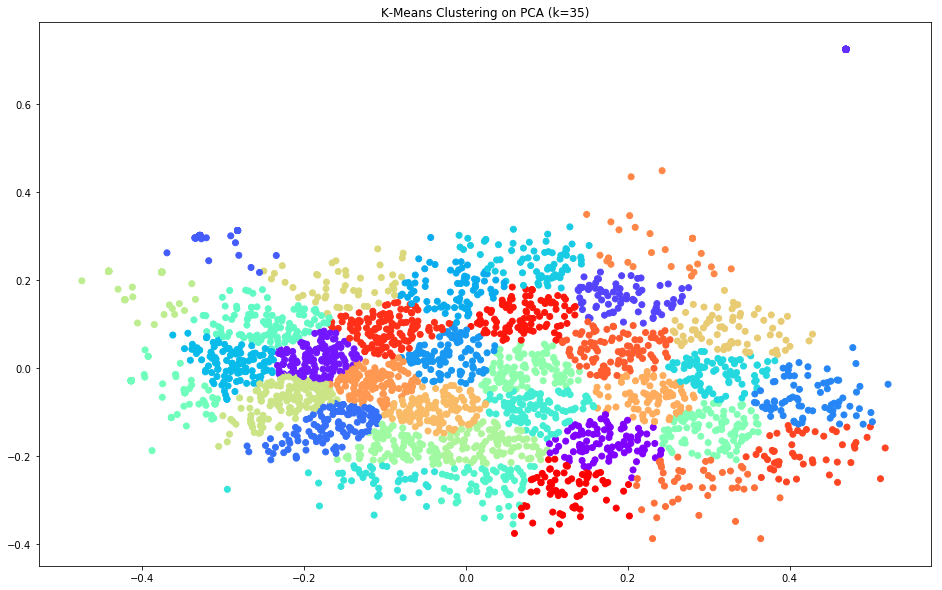

In [17]:
# reduce data with pca and cluster again
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(embeddings)
pca_labels = cluster_kmeans(pca, 35)
plt.figure(figsize=(16, 10))
plt.scatter(pca[:, 0], pca[:, 1], c=pca_labels, cmap='rainbow')
plt.title('K-Means Clustering on PCA (k=35)')
plt.show()

### Agglomerative Clustering

Agglomerative clustering is a hierarchical linkage distance based method that recuresively merges the pair of clusters that are the closest to each other. Naturally, it needs a termination criterion, here the number of clusters at which to stop.

Linkage strategies are:
* **Single linkage**: The distance of the closest points between two clusters: $max_{x\in c_i, y \in c_j} sim(x,y)$
* **Complete linkage**: The distances of the two farthest points between two clusters: $min_{x\in c_i, y \in c_j} sim(x,y)$
* **Average linkage**: The average of the distances between all pairs of points in two clusters.
* **Ward linkage**: Minimizes the variance between points (i.e. error sum of squares).

In [18]:
from sklearn.cluster import AgglomerativeClustering

def agglomerative(embeddings, n_clusters, linkage='ward'):
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage).fit(embeddings)
    return clustering.labels_

In [19]:
normalized_embeddings = embeddings /  np.linalg.norm(embeddings, axis=1, keepdims=True)
ag_labels = agglomerative(normalized_embeddings, 25, linkage='single')
ag_homogenity, ag_completeness, ag_rand_score = get_metrics(uva_embed['label'], ag_labels)
cluster_results = cluster_results.append({'Method': 'Agglomerative (single)', 'Homogeneity': ag_homogenity, 
    'Completeness': ag_completeness, 'Rand_score': ag_rand_score, 
    'Comment': 'n = 25'}, ignore_index=True)
cluster_results.tail(1)

Homogeneity: 0.016
Completeness: 0.261
Adjusted Rand Index: -0.003


,Method,Homogeneity,Completeness,Rand_score,Comment
4,Agglomerative (single),0.016027,0.261441,-0.002732,n = 25


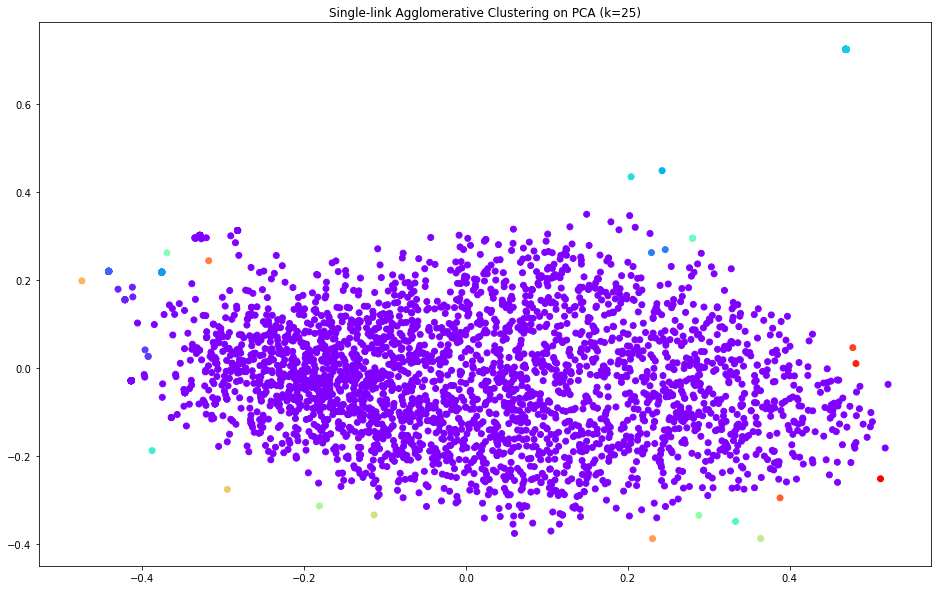

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(normalized_embeddings)
pca_labels = agglomerative(pca, 25, 'single')
plt.figure(figsize=(16, 10))
plt.scatter(pca[:, 0], pca[:, 1], c=pca_labels, cmap='rainbow')
plt.title('Single-link Agglomerative Clustering on PCA (k=25)')
plt.show()

In [24]:
ag_labels = agglomerative(normalized_embeddings, 25, linkage='complete')
ag_homogenity, ag_completeness, ag_rand_score = get_metrics(uva_embed['label'], ag_labels)
cluster_results = cluster_results.append({'Method': 'Agglomerative (complete)', 'Homogeneity': ag_homogenity, 
    'Completeness': ag_completeness, 'Rand_score': ag_rand_score, 
    'Comment': 'n = 25'}, ignore_index=True)
cluster_results.tail(1)

Homogeneity: 0.214
Completeness: 0.226
Adjusted Rand Index: 0.060


,Method,Homogeneity,Completeness,Rand_score,Comment
5,Agglomerative (complete),0.214,0.226302,0.060171,n = 25


The completeness is almost similar as with single link, but is much more homogenous.

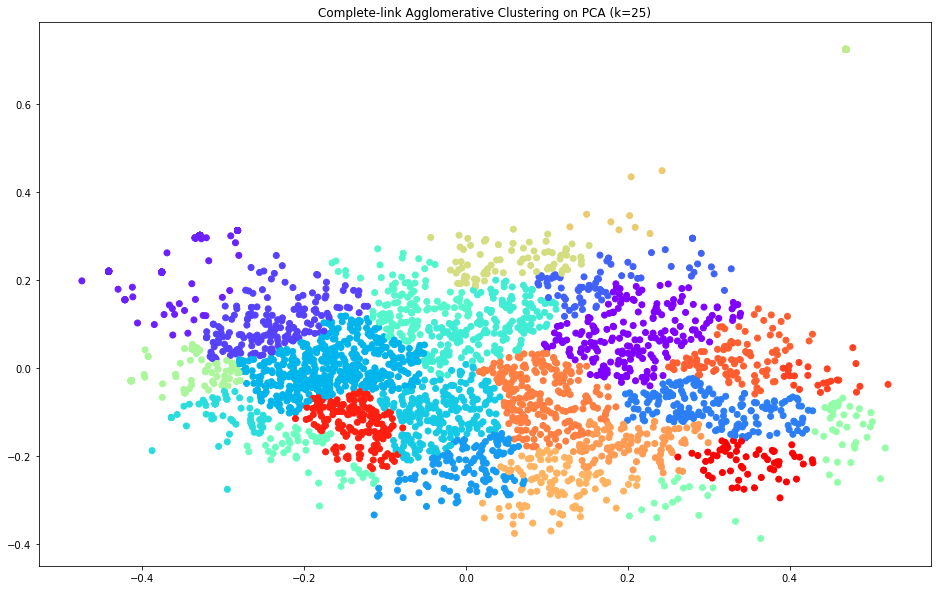

In [28]:
pca = PCA(n_components=2).fit_transform(normalized_embeddings)
pca_labels = agglomerative(pca, 25, 'complete')
plt.figure(figsize=(16, 10))
plt.scatter(pca[:, 0], pca[:, 1], c=pca_labels, cmap='rainbow')
plt.title('Complete-link Agglomerative Clustering on PCA (k=25)')
plt.show()

In [25]:
ag_labels = agglomerative(normalized_embeddings, 25, linkage='average')
ag_homogenity, ag_completeness, ag_rand_score = get_metrics(uva_embed['label'], ag_labels)
cluster_results = cluster_results.append({'Method': 'Agglomerative (average)', 'Homogeneity': ag_homogenity, 
    'Completeness': ag_completeness, 'Rand_score': ag_rand_score, 
    'Comment': 'n = 25'}, ignore_index=True)
cluster_results.tail(1)

Homogeneity: 0.044
Completeness: 0.250
Adjusted Rand Index: -0.002


,Method,Homogeneity,Completeness,Rand_score,Comment
6,Agglomerative (average),0.044481,0.250355,-0.001944,n = 25


As expected, it's a compromise between single and complete link.

In [31]:
ag_labels = agglomerative(normalized_embeddings, 25, linkage='ward')
ag_homogenity, ag_completeness, ag_rand_score = get_metrics(uva_embed['label'], ag_labels)
cluster_results = cluster_results.append({'Method': 'Agglomerative (ward)', 'Homogeneity': ag_homogenity, 
    'Completeness': ag_completeness, 'Rand_score': ag_rand_score, 
    'Comment': 'n = 25'}, ignore_index=True)
cluster_results.tail(1)

Homogeneity: 0.312
Completeness: 0.292
Adjusted Rand Index: 0.092


,Method,Homogeneity,Completeness,Rand_score,Comment
7,Agglomerative (ward),0.311689,0.292435,0.091847,n = 25


This is far better than all three, as suggested in the paper. We could now tweak the number of clusters.

In [32]:
for n in [30, 35, 40]:
    ag_labels = agglomerative(normalized_embeddings, n, linkage='ward')
    ag_homogenity, ag_completeness, ag_rand_score = get_metrics(uva_embed['label'], ag_labels)
    cluster_results = cluster_results.append({'Method': 'Agglomerative (ward)', 'Homogeneity': ag_homogenity, 
        'Completeness': ag_completeness, 'Rand_score': ag_rand_score, 
        'Comment': 'n = %d' %n}, ignore_index=True)
cluster_results.tail(4)

Homogeneity: 0.335
Completeness: 0.296
Adjusted Rand Index: 0.092
Homogeneity: 0.351
Completeness: 0.293
Adjusted Rand Index: 0.090
Homogeneity: 0.359
Completeness: 0.291
Adjusted Rand Index: 0.086


,Method,Homogeneity,Completeness,Rand_score,Comment
7,Agglomerative (ward),0.311689,0.292435,0.091847,n = 25
8,Agglomerative (ward),0.335078,0.296006,0.092481,n = 30
9,Agglomerative (ward),0.350754,0.292527,0.089921,n = 35
10,Agglomerative (ward),0.359425,0.290535,0.086088,n = 40


There is a good tradeoff at n = 35.

In [58]:
ag_labels = agglomerative(normalized_embeddings, 35, linkage='ward')
print_samples(ag_labels, uva_embed)

Cluster  8  -  77  courses:
['A Golden Age? History and Heritage of the Dutch Republic', 'Cardiovascular Diseases', 'Epidemiology', 'Global Identity', 'Infectious Diseases', 'International Public Health', 'Theme Health and Well-being: Lifestyle and Disease', 'Academic Excellence Track', 'Archaeology and the City', 'Cities Past and Present', 'Current Debates in Music', 'Film Analysis', 'Film Practices', 'Golden Age Amsterdam as a Creative City', 'Italian Language Proficiency and Culture 2']

Cluster  34  -  192  courses:
['Academic Writing Skills', 'Advanced Creative Writing', 'Advanced Research Writing', 'Capstone', 'Community Project', 'Contemporary Postcolonial Literature', 'Creative Writing', 'Dutch B1.2', 'French A2', 'French B1.1', 'French B1.2', 'Gastronomy: the Applied Sciences of Cooking', 'Modern Philosophical Texts', 'New Media Analysis', 'Physics Lab']

Cluster  33  -  67  courses:
['Adaptation Studies', 'Author in Context', 'Chinese I', 'Chinese II', 'Chinese III', 'Introdu

The clusters with ward linkage are much more uniformly sized than the other three methods. (Note that the above are only the first fifteen entries of each cluster). For example, the 34th cluster has many 'writing' and 'linguistic' themed entries, while the 27th cluster has many 'bio-technology' related courses. Notice how this is different from 18th cluster with data science and statistics topics, a much larger cluster.

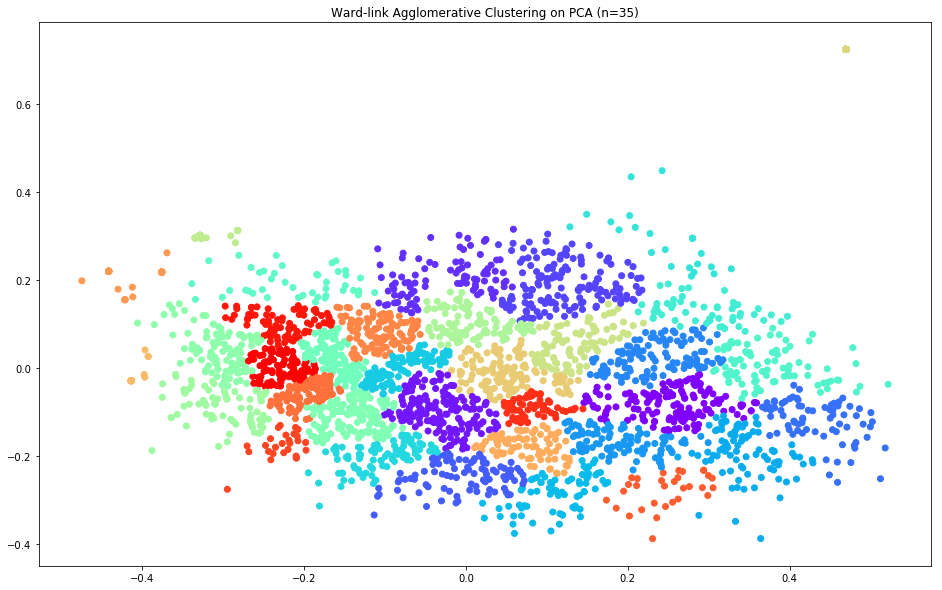

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(normalized_embeddings)
pca_labels = agglomerative(pca, 35, 'ward')
plt.figure(figsize=(16, 10))
plt.scatter(pca[:, 0], pca[:, 1], c=pca_labels, cmap='rainbow')
plt.title('Ward-link Agglomerative Clustering on PCA (n=35)')
plt.show()

In [59]:
cluster_results.to_csv('data/cluster_results.csv')

### DBSCAN Clustering

The DBSCAN is a density-based algorithm which views clusters as areas of high density separated by low density areas. Clusters found by DBSCAN can be any shape. A cluster is a set of core samples, each close to each other (by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, `min_samples` and `eps`, which define the 'dense' areas.

In [36]:
from sklearn.cluster import DBSCAN

def dbscan(embeddings, eps=0.5, min_samples=5):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(embeddings)
    return db.labels_

In [40]:
eps = 0.5
min_samples = 5
db_labels = dbscan(normalized_embeddings, eps, min_samples)
db_homogenity, db_completeness, db_rand_score = get_metrics(uva_embed['label'], db_labels)
cluster_results = cluster_results.append({'Method': 'DBSCAN', 'Homogeneity': db_homogenity, 
    'Completeness': db_completeness, 'Rand_score': db_rand_score, 
    'Comment': 'eps = %.2f, min_samples = %d' %(eps, min_samples)}, ignore_index=True)
cluster_results.tail(1)

Homogeneity: 0.085
Completeness: 0.390
Adjusted Rand Index: 0.002


,Method,Homogeneity,Completeness,Rand_score,Comment
11,DBSCAN,0.085341,0.390036,0.001533,"eps = 0.50, min_samples = 5"


In [43]:
n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
print('Number of clusters: %d' % n_clusters_)

Number of clusters: 20


In [60]:
print_samples(db_labels, uva_embed)

Cluster  0  -  2862  courses:
['A Golden Age? History and Heritage of the Dutch Republic', 'Academic Writing Skills', 'Adaptation Studies', 'Addiction', 'Advanced Creative Writing', 'Advanced Geosciences', 'Advanced Macro-Economics', 'Advanced Micro-Economics', 'Advanced Programming', 'Advanced Research Methods and Statistics', 'Advanced Research Writing', 'Ancient Philosophical Texts', 'Anthropologies of Community', 'Arabic I', 'Arabic II']

Cluster  1  -  5  courses:
['Dutch A1', 'Dutch A2', 'Dutch B1.1', 'Dutch Language Skills 1a', 'Dutch Language Skills 1b']

Cluster  2  -  70  courses:
['Aansprakelijkheid uit onrechtmatige daad en wanprestatie(Open UvA course)', 'Internationaal privaatrecht(Open UvA course)', 'Vennootschaps- en rechtspersonenrecht(Open UvA course)', 'Bachelorstage', 'Politieke Communicatie en Journalistiek (DCW4)', 'Workshop', 'Atelier de recherche', 'Bachelorscriptie Archeologie', 'Bachelorscriptie Oudheidwetenschappen', 'Catalan 1a', 'Christendom', 'Discurso y a

Although the cluster sizes are very uneven, the themes can be easily detected. For example, the Dutch-taught courses are fully separated from the English-taught courses, while linguistic 'Dutch' and 'German' courses each have their own clusters.

In [51]:
tests = [(0.5, 2), (0.5, 7), (0.75, 2), (0.75, 5), (0.75, 7), (0.25, 2), (0.25, 5), (0.25, 7)]
for eps, min_samples in tests:
    db_labels = dbscan(normalized_embeddings, eps, min_samples)
    db_homogenity, db_completeness, db_rand_score = get_metrics(uva_embed['label'], db_labels, verbose=False)
    cluster_results = cluster_results.append({'Method': 'DBSCAN', 'Homogeneity': db_homogenity, 
        'Completeness': db_completeness, 'Rand_score': db_rand_score, 
        'Comment': 'eps = %.2f, min_samples = %d' %(eps, min_samples)}, ignore_index=True)
    print('eps = %.2f, min_samples = %d' %(eps, min_samples))
    print('Number of clusters: %d' % (len(set(db_labels)) - (1 if -1 in db_labels else 0)))
    print(" ")
cluster_results.tail(8)

eps = 0.50, min_samples = 2
Number of clusters: 158
 
eps = 0.50, min_samples = 7
Number of clusters: 12
 
eps = 0.75, min_samples = 2
Number of clusters: 266
 
eps = 0.75, min_samples = 5
Number of clusters: 35
 
eps = 0.75, min_samples = 7
Number of clusters: 17
 
eps = 0.25, min_samples = 2
Number of clusters: 125
 
eps = 0.25, min_samples = 5
Number of clusters: 18
 
eps = 0.25, min_samples = 7
Number of clusters: 11
 


,Method,Homogeneity,Completeness,Rand_score,Comment
13,DBSCAN,0.176564,0.361243,0.002853,"eps = 0.50, min_samples = 2"
14,DBSCAN,0.071372,0.388598,0.001102,"eps = 0.50, min_samples = 7"
15,DBSCAN,0.270480,0.331082,0.005228,"eps = 0.75, min_samples = 2"
16,DBSCAN,0.109843,0.342393,0.000754,"eps = 0.75, min_samples = 5"
17,DBSCAN,0.084591,0.360011,0.001772,"eps = 0.75, min_samples = 7"
18,DBSCAN,0.143108,0.352381,-0.000313,"eps = 0.25, min_samples = 2"
19,DBSCAN,0.073355,0.369235,-0.000680,"eps = 0.25, min_samples = 5"
20,DBSCAN,0.061779,0.370442,-0.000746,"eps = 0.25, min_samples = 7"


The number of clusters heavily depends on the two DBSCAN parameters, `min_samples` and `eps`, ranging from as few as 11 to as many as 266 clusters. Due to this large range, it is hard to determine the best value (especially seeing how it is much smaller than other two methods), but it seems the combination of `eps = 0.75` and `min_samples = 5` is a good one, giving us the same 35 clusters as the previous optimal points. Although the default values give better Rand Score.

### Clustering Conclusion

In [61]:
cluster_results

,Method,Homogeneity,Completeness,Rand_score,Comment
0,K-Means,0.303484,0.277030,0.087979,k = 25
1,K-Means,0.319773,0.277523,0.087294,k = 30
2,K-Means,0.339446,0.283130,0.092427,k = 35
3,K-Means,0.342225,0.275487,0.086915,k = 40
4,Agglomerative (single),0.016027,0.261441,-0.002732,n = 25
5,Agglomerative (complete),0.214000,0.226302,0.060171,n = 25
6,Agglomerative (average),0.044481,0.250355,-0.001944,n = 25
7,Agglomerative (ward),0.311689,0.292435,0.091847,n = 25
8,Agglomerative (ward),0.335078,0.296006,0.092481,n = 30
9,Agglomerative (ward),0.350754,0.292527,0.089921,n = 35


Separating by various scores, the best homogeneity score is for Agglomerative Clustering (ward-linkage, n=40) at `0.359`. The best completeness score is for DBSCAN (0.5, 5) at `0.39`. The best Rand Score is for Agglomerative (ward-linkage, n=30) at `0.0925`.

Overall speaking, the DBSCAN has worst average scores, while Agglomerate (ward) has the best.

## Classification

In [10]:
uva_class = uva[['Department', 'Course title', 'Unit', 'merged_clean']]
# rename columns
uva_class.columns = ['label', 'title', 'credit', 'text']
uva_class['credit'] = uva_class['credit'].str.replace('[^0-9]', '')
uva_class.head()

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,label,title,credit,text
0,AUC,A Golden Age? History and Heritage of the Dutc...,6,called golden age corresponds roughly 17th cen...
1,AUC,Academic Writing Skills,6,academic writing skill introduction academic s...
2,AUC,Adaptation Studies,6,although originality work literature art often...
3,AUC,Addiction,6,goal course gain insight etiology neurobiology...
4,AUC,Advanced Creative Writing,6,course continues diverse exploration creative ...


In [11]:
import re
import nltk
import string
nltk.download('wordnet')
nltk.download('stopwords')
def clean_text(text, stopwords=None, flem=False, fstem=False):
  text = re.sub(r'[^\w\s\d]', '', str(text).lower().strip())
  text = "".join([char.lower() for char in text if char not in string.punctuation]) 
  lst_text = text.split()
  if stopwords is not None:
    lst_text = [word for word in lst_text if word not in 
                stopwords]
  if fstem == True:
    ps = nltk.stem.porter.PorterStemmer()
    lst_text = [ps.stem(word) for word in lst_text]
  if flem == True:
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    lst_text = [lem.lemmatize(word) for word in lst_text]
  text = " ".join(lst_text)
  return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\afzad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\afzad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
stopwords = nltk.corpus.stopwords.words("english") + nltk.corpus.stopwords.words("dutch")

In [13]:
uva_class['title'] = uva["Course title"].apply(lambda x: 
          clean_text(x, flem=True, stopwords=stopwords))
uva_class.head(10)

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,label,title,credit,text
0,AUC,golden age history heritage dutch republic,6,called golden age corresponds roughly 17th cen...
1,AUC,academic writing skill,6,academic writing skill introduction academic s...
2,AUC,adaptation study,6,although originality work literature art often...
3,AUC,addiction,6,goal course gain insight etiology neurobiology...
4,AUC,advanced creative writing,6,course continues diverse exploration creative ...
5,AUC,advanced geosciences,6,history universe big bang galaxy formation nuc...
6,AUC,advanced macroeconomics,6,financial crisis 20082009 accompanying worldwi...
7,AUC,advanced microeconomics,6,course develops student understanding method m...
8,AUC,advanced programming,6,end course understanding programming language ...
9,AUC,advanced research method statistic,6,course cover series technique advanced covered...


In [14]:
# use tfidf vectorization on title and text columns
from sklearn import feature_extraction, feature_selection
title_vectorizer = feature_extraction.text.TfidfVectorizer(max_features=1000, ngram_range=(1,2), max_df=0.8)
X = uva_class['title'].values.tolist()
X = title_vectorizer.fit_transform(X)

In [83]:
dict_vocab = title_vectorizer.vocabulary_
print(list(dict_vocab.keys())[:25])

['age', 'history', 'heritage', 'dutch', 'academic', 'writing', 'skill', 'academic writing', 'study', 'advanced', 'creative', 'creative writing', 'macroeconomics', 'microeconomics', 'programming', 'research', 'method', 'statistic', 'research method', 'method statistic', 'ancient', 'philosophical', 'text', 'anthropology', 'community']


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, uva_class['label'], test_size=0.2, random_state=42)

### Decision Tree Classification

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

def decision_tree(X_train, y_train, max_depth=None, min_samples_split=2, min_samples_leaf=1):
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    clf.fit(X_train, y_train)
    return clf

In [17]:
def dt_classify(X_train, y_train, X_test, y_test, max_depth=None, min_samples_split=2, min_samples_leaf=1):
    clf = decision_tree(X_train, y_train, max_depth, min_samples_split, min_samples_leaf)
    y_pred = clf.predict(X_test)
    return y_pred, accuracy_score(y_test, y_pred), confusion_matrix(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')

In [18]:
class_results = pd.DataFrame(columns=['Method', 'Accuracy', 'F1 Score', 'Comment'])

In [19]:
dt_y_pred, dt_accuracy, dt_cmat, dt_f1 = dt_classify(X_train, y_train, X_test, y_test)
print('Decision Tree Accuracy: %.3f' % dt_accuracy)
print('Decision Tree F1 Score: %.3f' % dt_f1)
class_results = class_results.append({'Method': 'Decision Tree (titles)', 
    'Accuracy': dt_accuracy, 'F1 Score': dt_f1, 
    'Comment': 'max_depth = None, min_samples_split = 2, min_samples_leaf = 1'}, 
    ignore_index=True)

Decision Tree Accuracy: 0.401
Decision Tree F1 Score: 0.397


In [111]:
import random
for i in random.sample(range(1, 20), 5):
    print('Predicted department:', dt_y_pred[i])
    print('True department:', y_test.iloc[i])
    print(" ")

Predicted department: College of Social Sciences
True department: College of Social Sciences
 
Predicted department: College of Social Sciences
True department: College of Child Development and Education
 
Predicted department: Graduate School of Sciences
True department: Graduate School of Sciences
 
Predicted department: Graduate School of Informatics
True department: Graduate School of Informatics
 
Predicted department: Psychology
True department: Psychology
 


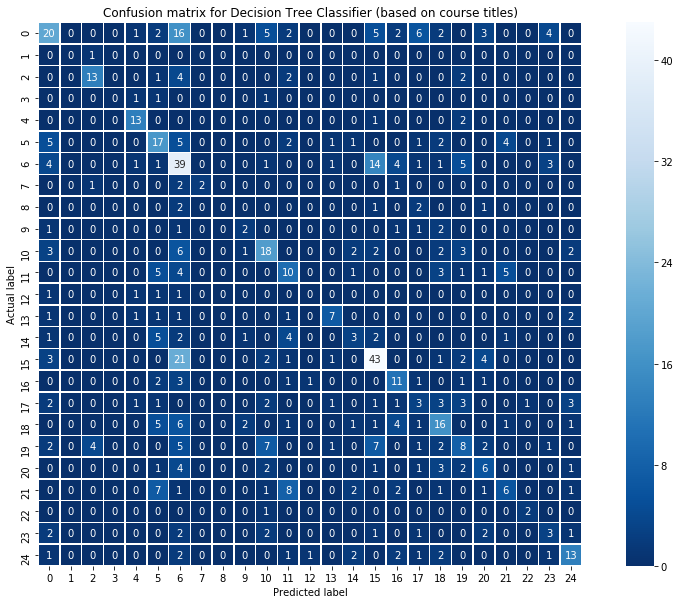

In [93]:
# visualise confusion matrix and use y_pred labels
plt.figure(figsize=(16, 10))
sns.heatmap(dt_cmat, annot=True, fmt='.0f', linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for Decision Tree Classifier (based on course titles)')
plt.show()

In [20]:
text_vectorizer = feature_extraction.text.TfidfVectorizer(max_features=3000, ngram_range=(1,2), max_df=0.8)
X = uva_class['text'].values.tolist()
# convert all X values without letters to blank
X = [re.sub(r'[^\w\s\d]', '', str(x).lower().strip()) for x in X]
X = text_vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, uva_class['label'], test_size=0.2, random_state=42)

In [133]:
dict_vocab = text_vectorizer.vocabulary_
print(list(dict_vocab.keys())[:25])

['called', 'age', 'century', 'important', 'period', 'dutch', 'history', 'increase', 'activity', 'time', 'increased', 'social', 'mobility', 'produced', 'class', 'art', 'literature', 'science', 'also', 'position', 'influence', 'urban', 'planning', 'architecture', 'topic']


In [21]:
dt_y_pred, dt_accuracy, dt_cmat, dt_f1 = dt_classify(X_train, y_train, X_test, y_test)
print('Decision Tree Accuracy: %.3f' % dt_accuracy)
print('Decision Tree F1 Score: %.3f' % dt_f1)
class_results = class_results.append({'Method': 'Decision Tree (texts)', 
    'Accuracy': dt_accuracy, 'F1 Score': dt_f1, 
    'Comment': 'max_depth = None, min_samples_split = 2, min_samples_leaf = 1'}, 
    ignore_index=True)

Decision Tree Accuracy: 0.709
Decision Tree F1 Score: 0.707


In [135]:
for i in random.sample(range(1, 20), 5):
    print('Predicted department:', dt_y_pred[i])
    print('True department:', y_test.iloc[i])
    print(" ")

Predicted department: College of Humanities
True department: Graduate School of Humanities
 
Predicted department: PPLE - Politics Psychology Law Economics
True department: PPLE - Politics Psychology Law Economics
 
Predicted department: College of Social Sciences
True department: College of Social Sciences
 
Predicted department: College of Social Sciences
True department: Psychology
 
Predicted department: AUC
True department: AUC
 


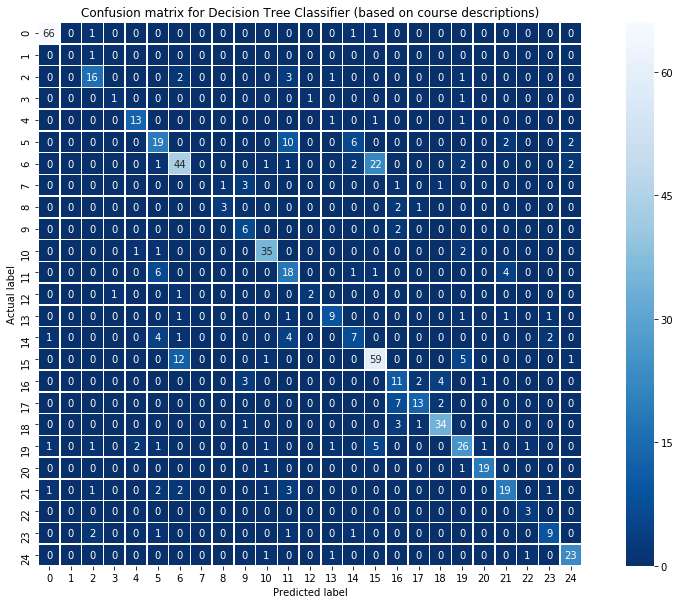

In [137]:
plt.figure(figsize=(16, 10))
sns.heatmap(dt_cmat, annot=True, fmt='.0f', linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for Decision Tree Classifier (based on course descriptions)')
plt.show()

# OLD CLUSTERING BITS:
@Tooraj pls review these

In [24]:
def add_special_BERT_tokens(cleaned_text):
    """
    Add special tokens to the cleaned text
    """        
    if cleaned_text == "" or cleaned_text == " " or cleaned_text == None or (not isinstance(cleaned_text, str)):
        return "[NOTHING]"
    
    cleaned_text = "[CLS] " + str(cleaned_text) + " [SEP]"
    
    return cleaned_text


In [27]:
#add necessary tokens for BERT to merged_clean column and save it to a new column
uva['merged_clean_bert'] = uva['merged_clean'].apply(lambda x: add_special_BERT_tokens(x))

#remove every row with [NOTHING] as merged_clean_bert
uva = uva[uva['merged_clean_bert'] != "[NOTHING]"]

uva.head()

,University,Abbreviation,Department,Course title,Unit,merged_clean,merged_clean_bert
0,Universiteit van Amsterdam,UvA,AUC,A Golden Age? History and Heritage of the Dutc...,6 EC,called golden age corresponds roughly 17th cen...,[CLS] called golden age corresponds roughly 17...
1,Universiteit van Amsterdam,UvA,AUC,Academic Writing Skills,6 EC,academic writing skill introduction academic s...,[CLS] academic writing skill introduction acad...
2,Universiteit van Amsterdam,UvA,AUC,Adaptation Studies,6 EC,although originality work literature art often...,[CLS] although originality work literature art...
3,Universiteit van Amsterdam,UvA,AUC,Addiction,6 EC,goal course gain insight etiology neurobiology...,[CLS] goal course gain insight etiology neurob...
4,Universiteit van Amsterdam,UvA,AUC,Advanced Creative Writing,6 EC,course continues diverse exploration creative ...,[CLS] course continues diverse exploration cre...


In [29]:
#save uva to a csv file for convinent loading
uva.to_csv("data/uva_bert_tokens_added.csv", index=False)

#load uva from csv file
uva = pd.read_csv("data/uva_bert_tokens_added.csv")
uva.head()

,University,Abbreviation,Department,Course title,Unit,merged_clean,merged_clean_bert
0,Universiteit van Amsterdam,UvA,AUC,A Golden Age? History and Heritage of the Dutc...,6 EC,called golden age corresponds roughly 17th cen...,[CLS] called golden age corresponds roughly 17...
1,Universiteit van Amsterdam,UvA,AUC,Academic Writing Skills,6 EC,academic writing skill introduction academic s...,[CLS] academic writing skill introduction acad...
2,Universiteit van Amsterdam,UvA,AUC,Adaptation Studies,6 EC,although originality work literature art often...,[CLS] although originality work literature art...
3,Universiteit van Amsterdam,UvA,AUC,Addiction,6 EC,goal course gain insight etiology neurobiology...,[CLS] goal course gain insight etiology neurob...
4,Universiteit van Amsterdam,UvA,AUC,Advanced Creative Writing,6 EC,course continues diverse exploration creative ...,[CLS] course continues diverse exploration cre...


In [30]:
def tokenize_and_add_segment_and_token_ID(bert_text):
    """
    Tokenize the text and add segment ID
    """
    global tokenizer
    tokenized_text = tokenizer.tokenize(bert_text)
    tokenized_text_with_id = tokenizer.convert_tokens_to_ids(tokenized_text)
    segment_ids = [1] * len(tokenized_text)
    return tokenized_text, tokenized_text_with_id, segment_ids

In [31]:
#add tokenized text and tokenized text with ID and segment ID to uva
uva['tokenized_text'], uva['tokenized_text_with_id'], uva['segment_ids'] = zip(*uva['merged_clean_bert'].apply(lambda x: tokenize_and_add_segment_and_token_ID(x)))

uva.head()

,University,Abbreviation,Department,Course title,Unit,merged_clean,merged_clean_bert,tokenized_text,tokenized_text_with_id,segment_ids
0,Universiteit van Amsterdam,UvA,AUC,A Golden Age? History and Heritage of the Dutc...,6 EC,called golden age corresponds roughly 17th cen...,[CLS] called golden age corresponds roughly 17...,"[[CLS], called, golden, age, corresponds, roug...","[101, 2170, 3585, 2287, 14788, 5560, 5550, 230...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Universiteit van Amsterdam,UvA,AUC,Academic Writing Skills,6 EC,academic writing skill introduction academic s...,[CLS] academic writing skill introduction acad...,"[[CLS], academic, writing, skill, introduction...","[101, 3834, 3015, 8066, 4955, 3834, 2817, 3192...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,Universiteit van Amsterdam,UvA,AUC,Adaptation Studies,6 EC,although originality work literature art often...,[CLS] although originality work literature art...,"[[CLS], although, original, ##ity, work, liter...","[101, 2348, 2434, 3012, 2147, 3906, 2396, 2411...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,Universiteit van Amsterdam,UvA,AUC,Addiction,6 EC,goal course gain insight etiology neurobiology...,[CLS] goal course gain insight etiology neurob...,"[[CLS], goal, course, gain, insight, et, ##iol...","[101, 3125, 2607, 5114, 12369, 3802, 20569, 11...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,Universiteit van Amsterdam,UvA,AUC,Advanced Creative Writing,6 EC,course continues diverse exploration creative ...,[CLS] course continues diverse exploration cre...,"[[CLS], course, continues, diverse, exploratio...","[101, 2607, 4247, 7578, 8993, 5541, 3015, 9009...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [42]:
#generate word embedding for each merged_clean_bert
def generate_model_output(indexed_token, segmentid):
    """
    Generate model output for given tokens
    """
    global model
    with torch.no_grad():
        outputs = model(torch.tensor([indexed_token]), torch.tensor([segmentid]))
        return outputs

def print_info_about_hidden_states(outputs, layer_index=0, batch_index=0, token_index=0):
    """
    Print information about hidden states
    """
    hidden_states = outputs[2]
    print("Hidden states:")
    #number of layers
    print("Number of layers:", len(hidden_states))

    #number of batches
    print("Number of batches:", len(hidden_states[layer_index]))

    #number of tokens
    print("Number of tokens:", len(hidden_states[layer_index][batch_index]))

    #number of hidden units
    print("Number of hidden units:", len(hidden_states[layer_index][batch_index][token_index]))

In [43]:
#test generate_word_embedding and print_info_about_hidden_states on a single row
outputs = generate_model_output(uva.iloc[0]['tokenized_text_with_id'], uva.iloc[0]['segment_ids'])
print_info_about_hidden_states(outputs)

Hidden states:
Number of layers: 13
Number of batches: 1
Number of tokens: 153
Number of hidden units: 768


In [46]:
#since we are feeding the model everything as a single sentece we can discard the batches
#also it would be nicer to reshape the hidden_states in a way that they are grouped by tokens instead of layers

def remove_batches_and_reshape_to_tokens(hidden_states):
    """
    Remove batches and reshape to tokens
    """
    token_embeddings = torch.stack(hidden_states, dim=0)
    #removing dimention 1 (batches)
    token_embeddings = torch.squeeze(token_embeddings, dim=1)

    #grouping by tokens using permute
    token_embeddings = token_embeddings.permute(1, 0, 2) #(tokens, layers, hidden_units(features))

    return token_embeddings

In [67]:
#we have to strategies ahead of us
#1. we need to combine these token vectors in a way that they represent a word
#2. we need to combine these hidden states (features) in a way that they represent a sentence

#ways are either sum or cat
def combine_token_vectors_to_words(token_embeddings, how_many_from_last=4, how_to_combine='sum'):
    """
    Combine token vectors to words
    """
    token_vecs_combined = []
    if how_to_combine == 'sum':
        #summing the vectors
        for token in token_embeddings:
            summed = torch.sum(token_embeddings[:-how_many_from_last], dim=0)
            token_vecs_combined.append(summed)
    elif how_to_combine == 'cat':
        #concatenating the vectors
        for token in token_embeddings:
            #create a tuple form n last elements of the token
            last_elements = tuple(token[-how_many_from_last:])
            concatenated = torch.cat(last_elements, dim=0)
            token_vecs_combined.append(concatenated)
    return token_vecs_combined

def combine_token_vectors_to_sentence(hidden_states, start=2):
    """
    Combine token vectors to sentence using mean
    """
    hs = hidden_states[-start:][0]
    sentence_embedding = torch.mean(hs, dim=0)
    return sentence_embedding

In [73]:
def sentence_embedding_pipeline(indexed_token, segment_id):
    sentence_embedding = None
    try:
        outputs = generate_model_output(indexed_token, segment_id)
        hidden_states = remove_batches_and_reshape_to_tokens(outputs[2])
        sentence_embedding = combine_token_vectors_to_sentence(hidden_states)
    except:
        return None
    return sentence_embedding.numpy()

In [65]:
#test sentence_embedding_pipeline on a single row
sentence_embedding = sentence_embedding_pipeline(uva.iloc[0]['tokenized_text_with_id'], uva.iloc[0]['segment_ids'])
#convert tensor to array and print
sentence_embedding.size()

Shape of hs: torch.Size([13, 768])


torch.Size([768])

In [74]:
#generate sentence embedding for each row
uva['sentence_embedding'] = uva.apply(lambda x: sentence_embedding_pipeline(x['tokenized_text_with_id'], x['segment_ids']), axis=1)

uva.head()

,University,Abbreviation,Department,Course title,Unit,merged_clean,merged_clean_bert,tokenized_text,tokenized_text_with_id,segment_ids,sentence_embedding
0,Universiteit van Amsterdam,UvA,AUC,A Golden Age? History and Heritage of the Dutc...,6 EC,called golden age corresponds roughly 17th cen...,[CLS] called golden age corresponds roughly 17...,"[[CLS], called, golden, age, corresponds, roug...","[101, 2170, 3585, 2287, 14788, 5560, 5550, 230...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.73521274, 0.004391347, -0.2594675, 0.293618..."
1,Universiteit van Amsterdam,UvA,AUC,Academic Writing Skills,6 EC,academic writing skill introduction academic s...,[CLS] academic writing skill introduction acad...,"[[CLS], academic, writing, skill, introduction...","[101, 3834, 3015, 8066, 4955, 3834, 2817, 3192...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.2182603, 0.35577005, 0.58682275, -0.8109705..."
2,Universiteit van Amsterdam,UvA,AUC,Adaptation Studies,6 EC,although originality work literature art often...,[CLS] although originality work literature art...,"[[CLS], although, original, ##ity, work, liter...","[101, 2348, 2434, 3012, 2147, 3906, 2396, 2411...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.61570364, 0.83801043, -0.2723579, -0.211583..."
3,Universiteit van Amsterdam,UvA,AUC,Addiction,6 EC,goal course gain insight etiology neurobiology...,[CLS] goal course gain insight etiology neurob...,"[[CLS], goal, course, gain, insight, et, ##iol...","[101, 3125, 2607, 5114, 12369, 3802, 20569, 11...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.36432588, 0.49236968, 0.2854147, -1.2058219..."
4,Universiteit van Amsterdam,UvA,AUC,Advanced Creative Writing,6 EC,course continues diverse exploration creative ...,[CLS] course continues diverse exploration cre...,"[[CLS], course, continues, diverse, exploratio...","[101, 2607, 4247, 7578, 8993, 5541, 3015, 9009...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.61830354, 0.15859443, 0.35188314, -1.193507..."


In [161]:
#remove rows with None sentence embedding
uva = uva[uva['sentence_embedding'].notnull()]

# for x in uva['sentence_embedding']:
#     print(len(x) != 768)

In [80]:
uva.to_csv("data/uva_sentence_vectors.csv", index=False)


In [81]:
#importing clustering libraries
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_rand_score

In [210]:
def init_kmeans_clustering(x_sentence_vectors, n_clusters):
    """
    Init kmeans clustering
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    #reshape x_sentence_vectors to appropriate shape for kmeans
    x = np.vstack(x_sentence_vectors)
    # x = x.reshape(-1, 1)
    kmeans.fit(x)
    return kmeans

#find majority department for each cluster and assign that department as its label
def assign_labels_to_clusters(kmeans, departments):
    """
    Assign labels to clusters
    """
    labels = kmeans.labels_
    #create a dictionary with key=cluster_id and value=department
    cluster_department = {}
    for i in range(len(labels)):
        cluster_id = labels[i]
        department = departments[i]
        if cluster_id in cluster_department:
            cluster_department[cluster_id].append(department)
        else:
            cluster_department[cluster_id] = [department]
    #assign the most frequent department to each entry in cluster_department
    for cluster_id in cluster_department:
        cluster_department[cluster_id] = max(set(cluster_department[cluster_id]), key=cluster_department[cluster_id].count)
    return cluster_department

In [211]:
#test clustering on 3000 rows
number_of_unique_departments = len(uva['Department'].unique())
sentence_embeddings = uva['sentence_embedding'].values
kmeans = init_kmeans_clustering(uva['sentence_embedding'].values[:3000], n_clusters=number_of_unique_departments)
cluster_department = assign_labels_to_clusters(kmeans, uva['Department'].values[:3000])
print(cluster_department)

{3: 'Graduate School of Business', 16: 'College of Humanities', 0: 'Graduate school of Social Sciences', 10: 'Graduate School of Humanities', 5: 'College of Social Sciences', 8: 'Graduate School of Sciences', 20: 'Graduate School of Humanities', 23: 'Graduate School of Sciences', 18: 'Graduate School of Humanities', 9: 'College of Humanities', 22: 'AUC', 1: 'Graduate School of Humanities', 24: 'College of Humanities', 17: 'Graduate School of Humanities', 11: 'College of Humanities', 13: 'Graduate School of Business', 2: 'Graduate School of Humanities', 19: 'College of Life Sciences', 6: 'College of Humanities', 15: 'Graduate School of Life and Earth Sciences', 12: 'Institute for Interdisciplinary Studies', 7: 'Graduate school of Social Sciences', 4: 'Graduate School of Informatics', 14: 'Graduate School of Humanities', 21: 'Graduate School of Sciences'}


In [216]:
#measure accuracy of clustering
def measure_accuracy(cluster_department, kmeans_labels, departments):
    #first we need to map kmeans_labels to departments using cluster_department
    kmeans_labels_departments = []
    for i in range(len(kmeans_labels)):
        kmeans_labels_departments.append(cluster_department[kmeans_labels[i]])
    #then we can measure accuracy
    return accuracy_score(departments, kmeans_labels_departments)

In [217]:
number_of_unique_departments = len(uva['Department'].unique())

kmeans = init_kmeans_clustering(uva['sentence_embedding'].values, n_clusters=number_of_unique_departments)
cluster_department = assign_labels_to_clusters(kmeans, uva['Department'].values)

accuracy = measure_accuracy(cluster_department, kmeans.labels_, uva['Department'].values)
print(accuracy)

0.21968190854870775
